# Model configuration summary

**Control run name**: Southern Shelf  + Drake Passage

**Perturbation run name**: Southern Shelf + Drake Passage + Northern Weddell Ridge

**Key**:<br/>
SS: Southern Shelf<br/>
DP: Drake Passage<br/>
NWR: Northern Weddell Ridge<br/>

**Goal**: To isolate the impact of the northern Weddell Ridge, when constant heat fluxes are imposed along the shelf.

**Note**: These model runs branch from the ones shown in analysis_scratch3

**Model Config**:<br/>

|       Parameter      |      Value     |                    Description                    |
|:--------------------:|:--------------:|:-------------------------------------------------:|
|         $L_x$        |     4000 km    |                 Zonal domain dize                 |
|         $L_x$        |     2500 km    |               Meridonial domain size              |
|          $H$         |     4000 m     |                   Maximum ocean depth             |
| $\Delta x, \Delta y$ |   $\sim$10 km  |                Horizontal grid spacing            |
|      $\Delta t$      |      617 s     |                   Time step size                  |
|      $\Delta z$      |   10$-$100 m   |                 vertical grid spacing             |
|         $L_r$        |     100 km     |    Meridional width of northern<br>sponge layer   |
|       $\tau_r$       |     7 days     | Relaxation time scale of<br>northern sponge layer |
|    $\Theta_{AABW}$   |       N/A      |             Temperature of AABW source            |
|      $X_{AABW}$      |     -500 km    |        Location of AABW source<br>on shelf        |
|   $\Delta X_{AABW}$  |     400 km     |          Width of AABW source<br>on shelf         |
|   (To be continued)  |                |                                                   |

In [1]:
import numpy as np
import helper_functions as hf
import plot_functions as pf
import matplotlib.pylab as plt
import overturning_funcs as of
import imp
import xarray as xr
import os
imp.reload(hf)
imp.reload(pf)
imp.reload(of)


# Set directory
exp_dir = '/central/groups/AndyThompsonGroup/earlew/MITgcm_PG/experiments/'  # For HPC
#exp_dir = '/Users/ewilson/research/modeling/MITgcm_PG/experiments'  # Office iMac mirror
hf.set_exp_dir(exp_dir)

In [23]:
# define general plotting and analysis parameters
exp_names = ['gyre_ctrl_run_128n_SS_WAP_DP_AABW_mode2_branch001', 
             'gyre_ctrl_run_128n_SS_WAP_DP_NWR_AABW_mode2_branch001']


exp_names_ctrl = ['gyre_ctrl_run_128n_SS_WAP_DP_AABW_mode2', 
                  'gyre_ctrl_run_128n_SS_WAP_DP_NWR_AABW_mode2']


exp_names_alias = ['SS+DP', 'SS+DP+NWR']
fz = 14  # fontsize
#tr = [295, 295] # year range for averaging
tr = [336, 336]  # a bit clumsy
tr_avg = [335, 335]
suffix = '_inst'
plot_prtb=True

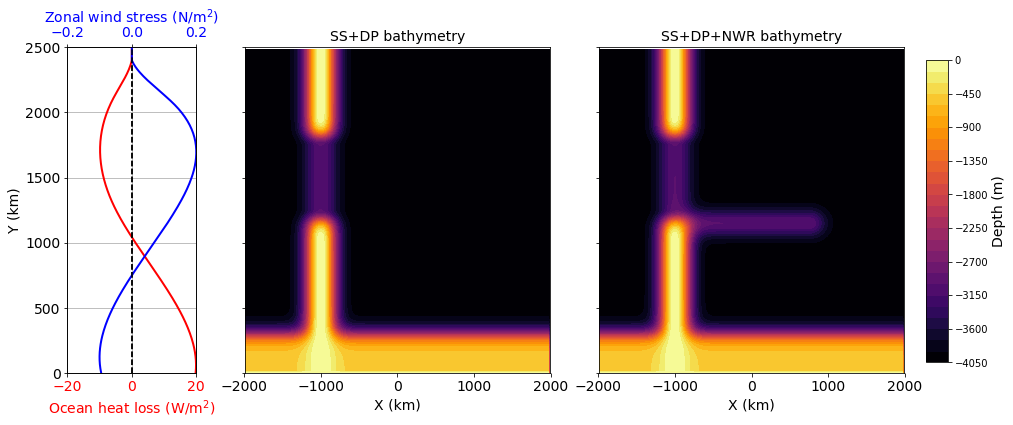

In [22]:
imp.reload(pf)
pf.plot_bathy_tau_surfq_v2(exp_names, exp_names_alias, fz=14, xlim1=[-20, 20], xlim2=[-0.2, 0.2], save_plots=True)

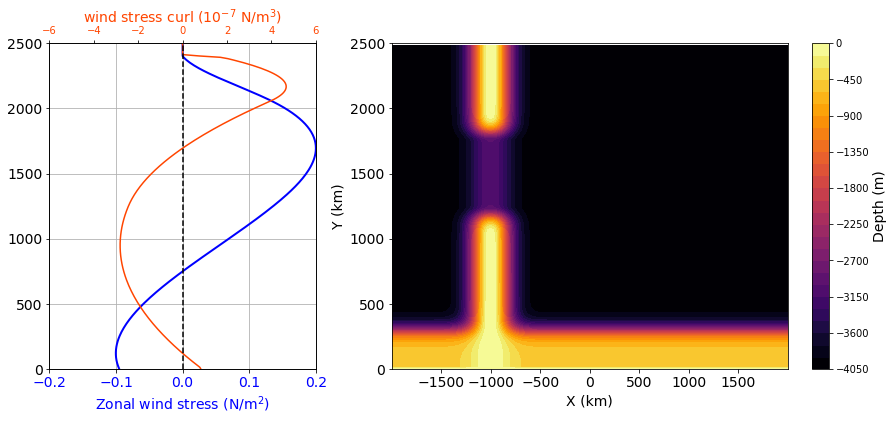

In [18]:
# show wind stress curl
imp.reload(pf)
pf.plot_tau_curl(exp_names[0])

# Assessment of model equilibrium

### Domain-averaged temperature

computing domain-average temps. May take a while...
gyre_ctrl_run_128n_SS_WAP_DP_AABW_mode2_branch001 updated to year 336.0
gyre_ctrl_run_128n_SS_WAP_DP_NWR_AABW_mode2_branch001 updated to year 336.0


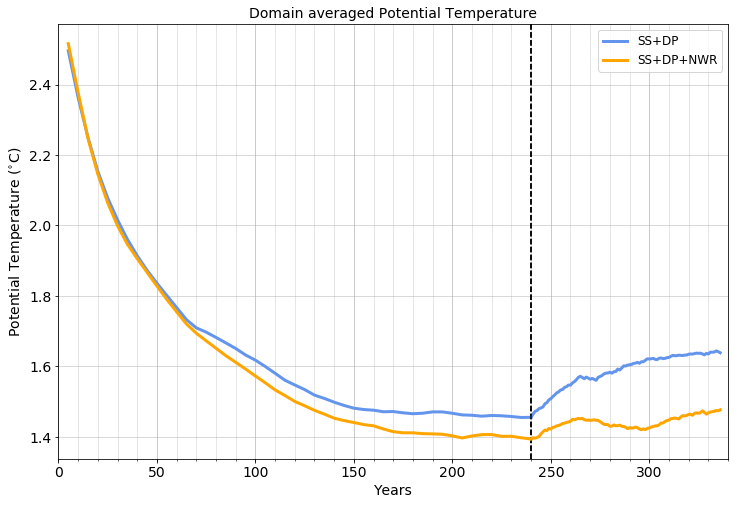

In [21]:
imp.reload(pf)
ctrl_fnames = ['%s_THETA_avg_tseries_tstep1.p' %exp_name for exp_name in  exp_names_ctrl]
pf.plot_mean_temp_series(exp_names, exp_names_alias, tstep=1, xstep=10, ctrl_fnames=ctrl_fnames)

### Domain-averaged bottom temperature

computing domain-average temps. May take a while...
gyre_ctrl_run_128n_SS_WAP_DP_AABW_mode2_branch001 updated to year 336.0
gyre_ctrl_run_128n_SS_WAP_DP_NWR_AABW_mode2_branch001 updated to year 336.0


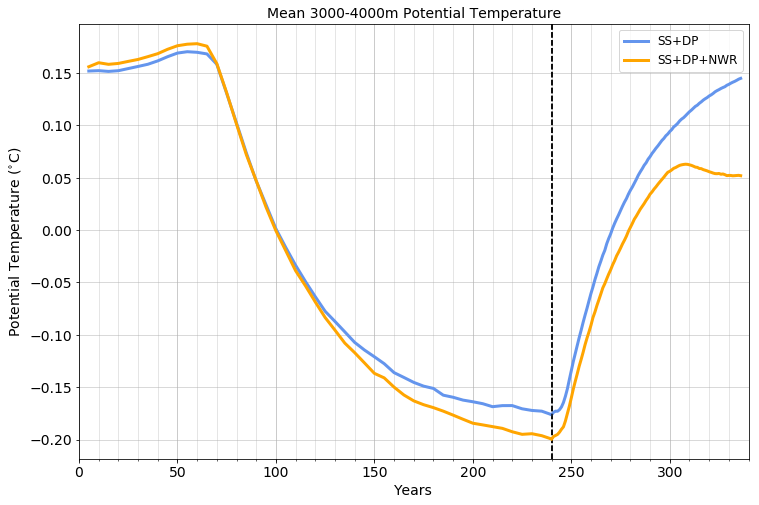

In [18]:
imp.reload(pf)
ctrl_fnames = ['%s_THETA_avg_3000-4000m_tseries_tstep1.p'%exp_name for exp_name in  exp_names_ctrl]
pf.plot_mean_temp_series(exp_names, exp_names_alias, xstep=10, zr=[-4000, -3000], ctrl_fnames=ctrl_fnames)

### Upper ocean temperature

computing domain-average temps. May take a while...
gyre_ctrl_run_128n_SS_WAP_DP_AABW_mode2_branch001 updated to year 336.0
gyre_ctrl_run_128n_SS_WAP_DP_NWR_AABW_mode2_branch001 updated to year 336.0


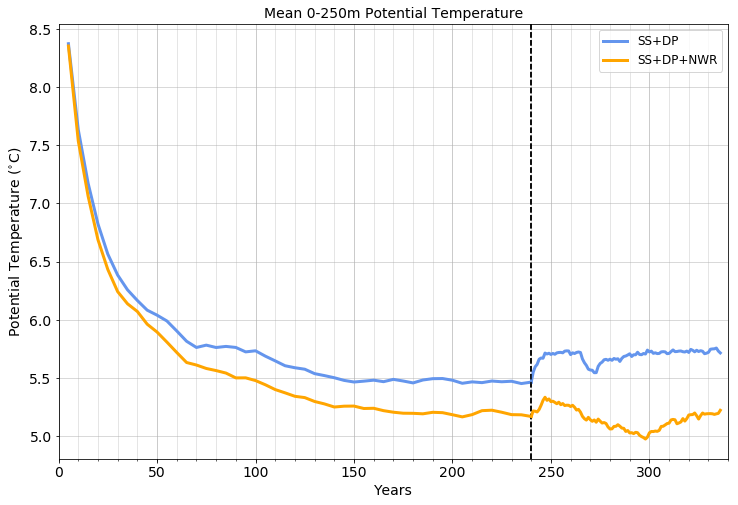

In [19]:
imp.reload(pf)
ctrl_fnames = ['%s_THETA_avg_0-250m_tseries_tstep1.p'%exp_name for exp_name in  exp_names_ctrl]
pf.plot_mean_temp_series(exp_names, exp_names_alias, tstep=1, zr=[-250, 0], ctrl_fnames=ctrl_fnames)

### Domain-averaged kinetic energy

computing domain-average TKE. May take a while...
gyre_ctrl_run_128n_SS_WAP_DP_AABW_mode2_branch001 updated to year 335.0
gyre_ctrl_run_128n_SS_WAP_DP_NWR_AABW_mode2_branch001 updated to year 335.0
[340.0, 340.0]


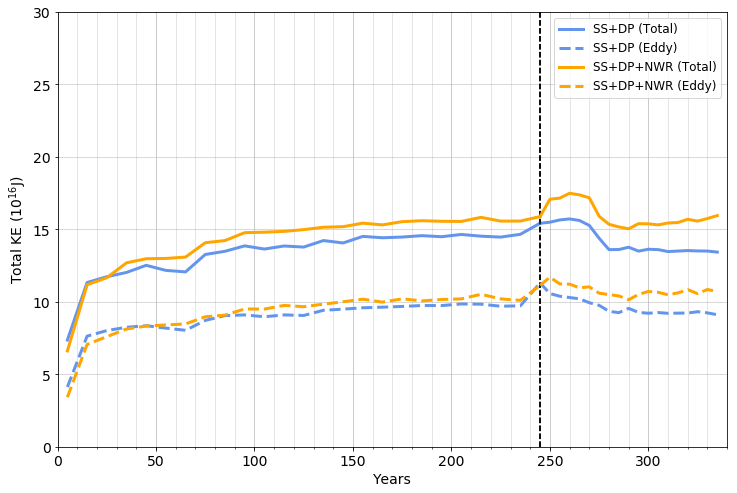

In [22]:
imp.reload(pf)
ctrl_fnames = ['%s_KE_tseries_tstep2.p'%exp_name for exp_name in  exp_names_ctrl]
pf.plot_TKE_series(exp_names, exp_names_alias, tstep=1, ctrl_fnames=ctrl_fnames)

# Layer-averaged properties 


### Near-surface temperature

Loading THETA for years 335-335...
Loading THETA for years 335-335...


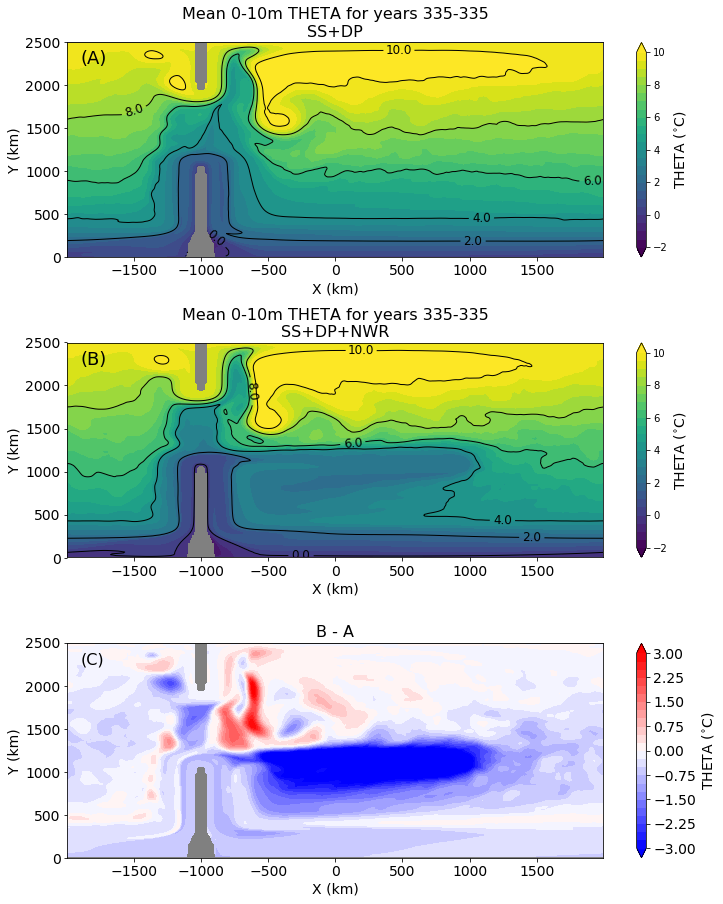

In [29]:
imp.reload(hf)
imp.reload(pf)
zr = [0, 10]
clvls = np.arange(-2, 10.01, 0.5)
clvls_ano = np.arange(-3.0, 3.1, 0.25)
vname = 'THETA'#+ suffix
pf.plot_layer_avg_anom(exp_names, vname, zr=zr, tr=tr_avg, plot_prtb=plot_prtb,
                       exp_names_alias=exp_names_alias, clvls=clvls, add_clines=True,
                       clvls_ano=clvls_ano, lcol='k', bg_col='0.5', fz=14)

### Bottom temperatures 

Loading THETA for years 335-335...
Loading THETA for years 335-335...


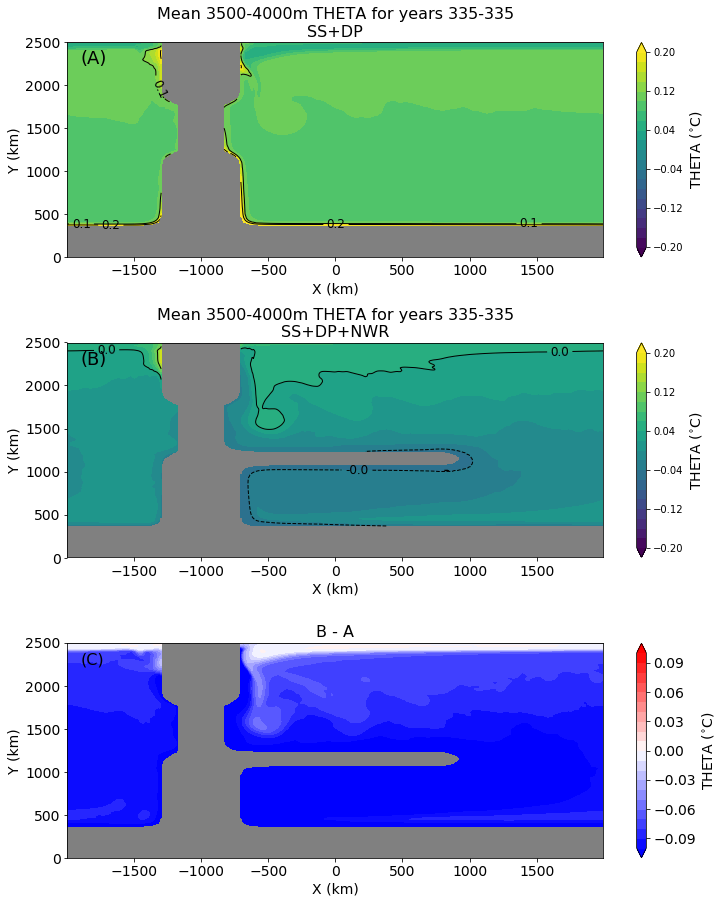

In [34]:
imp.reload(hf)
imp.reload(pf)
zr = [3500, 4000]
clvls = np.arange(-0.2, 0.21, 0.02)#np.arange(-0.06, 0.061, 0.005)
clvls_ano = np.arange(-0.1, 0.11, 0.01)
vname = 'THETA'#+ suffix
pf.plot_layer_avg_anom(exp_names, vname, zr=zr, tr=tr_avg, plot_prtb=plot_prtb,
                       exp_names_alias=exp_names_alias, clvls=clvls, add_clines=True,
                       clvls_ano=clvls_ano, lcol='k', bg_col='0.5', fz=14)

### Sea surface height

Loading PHIHYD for years 335-335...
Loading THETA for years 335-335...
Loading PHIHYD for years 335-335...


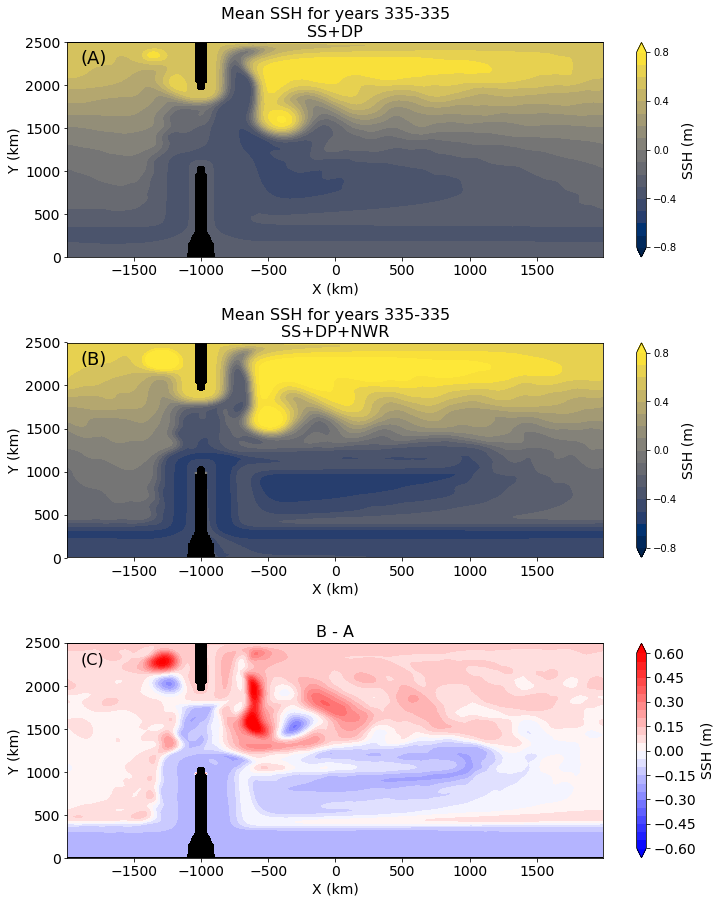

In [26]:
imp.reload(hf)
imp.reload(pf)
zr = [0, 10]
clvls = np.arange(-0.8, .801, 0.1)
clvls_ano = np.arange(-0.6, 0.61, 0.05)
vname = 'SSH'
pf.plot_layer_avg_anom(exp_names, vname, zr=zr, tr=tr_avg, exp_names_alias=exp_names_alias, 
                       plot_prtb=plot_prtb, clvls=clvls, clvls_ano=clvls_ano, add_clines=False,
                       cmap=plt.cm.cividis, lcol='k', bg_col='k', fz=14)

# Zonal sections

### Full zonal mean UVEL

Loading UVEL_inst for years 336-336...
Loading UVEL_inst for years 336-336...


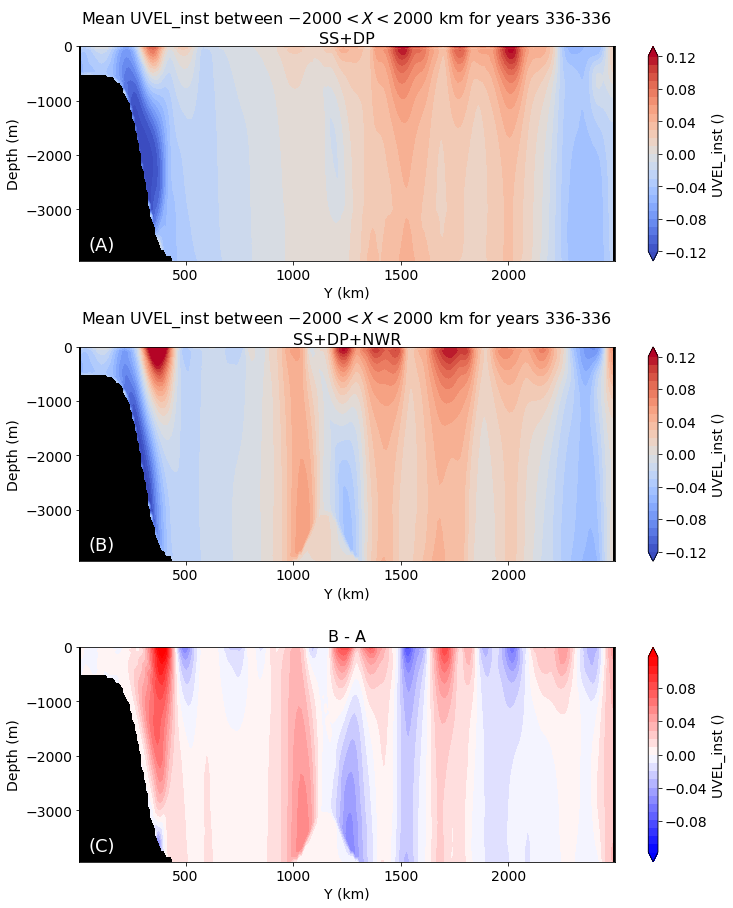

In [27]:
imp.reload(pf)
imp.reload(hf)
#tr = [89, 91]
xr = [-2000e3, 2000e3]
clvls = np.arange(-0.12, 0.121, 0.01)
vname = 'UVEL'+ suffix
pf.plot_zonal_sect_anom(exp_names, vname, xr=xr, tr=tr, exp_names_alias=exp_names_alias,  plot_prtb=plot_prtb, 
                        clvls=clvls, clvls_ano=[], cmap=plt.cm.coolwarm, fz=14)

### Full zonal mean temperature stratification

Loading THETA_inst for years 334-334...
Loading THETA_inst for years 334-334...


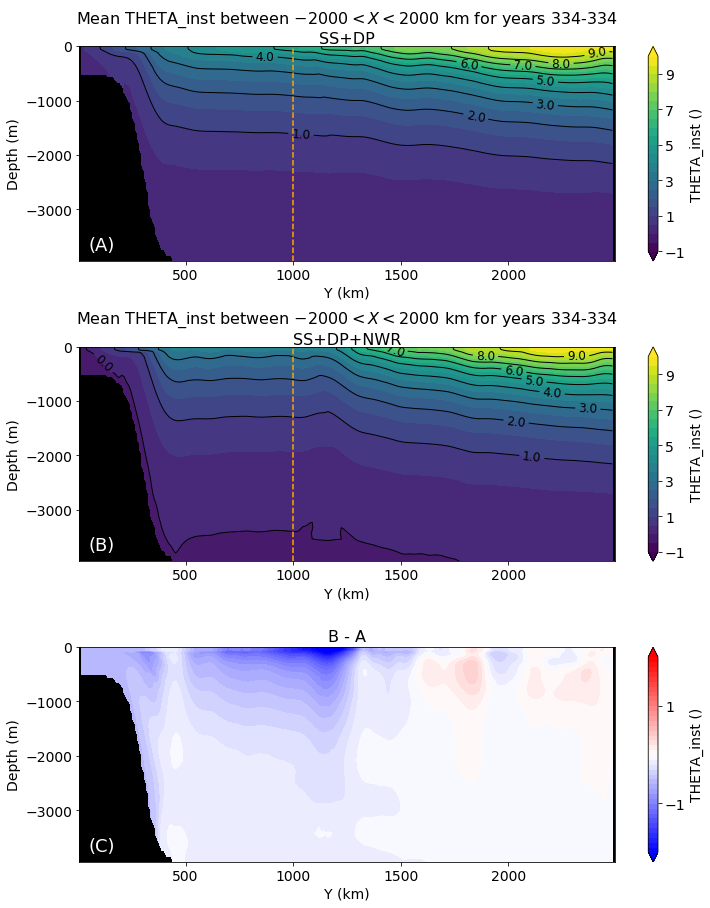

In [13]:
imp.reload(hf)
imp.reload(pf)

#tr = [89, 91]
xr = [-2000e3, 2000e3]
clvls = np.arange(-1, 10.01, 0.5)
clvls_ano = np.arange(-2, 2.1, 0.1)
vname = 'THETA'+ suffix
pf.plot_zonal_sect_anom(exp_names, vname, xr=xr, tr=tr, clvls=clvls, exp_names_alias=exp_names_alias, 
                        clvls_ano=clvls_ano, cmap=plt.cm.viridis, fz=14, plot_prtb=plot_prtb, plot_MLD=False)

### Temperature stratification across the "Atlantic" sector

Loading THETA_inst for years 334-334...
Loading THETA_inst for years 334-334...


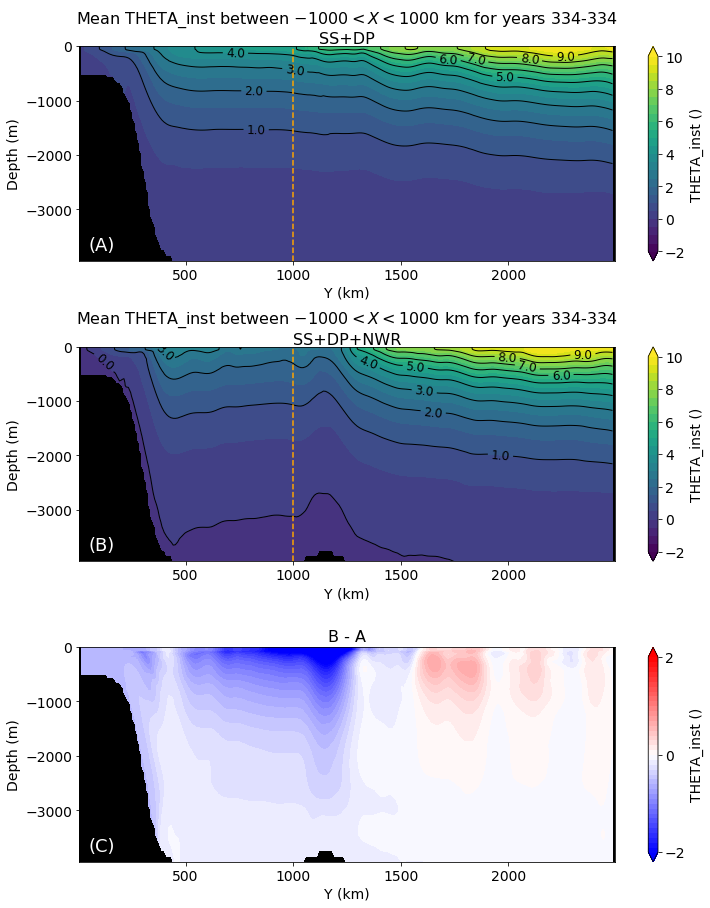

In [14]:
imp.reload(hf)
imp.reload(pf)

#tr = [89, 91]
xr = [-1000e3, 1000e3]
clvls = np.arange(-2, 10.01, 0.5)
clvls_ano = np.arange(-2, 2.1, 0.1)
vname = 'THETA'+ suffix
pf.plot_zonal_sect_anom(exp_names, vname, xr=xr, tr=tr, clvls=clvls, exp_names_alias=exp_names_alias, 
                        clvls_ano=clvls_ano, cmap=plt.cm.viridis, fz=14, plot_prtb=plot_prtb, plot_MLD=False)

### Temperature stratification across the "Pacific" sector

Loading THETA_inst for years 334-334...
Loading THETA_inst for years 334-334...


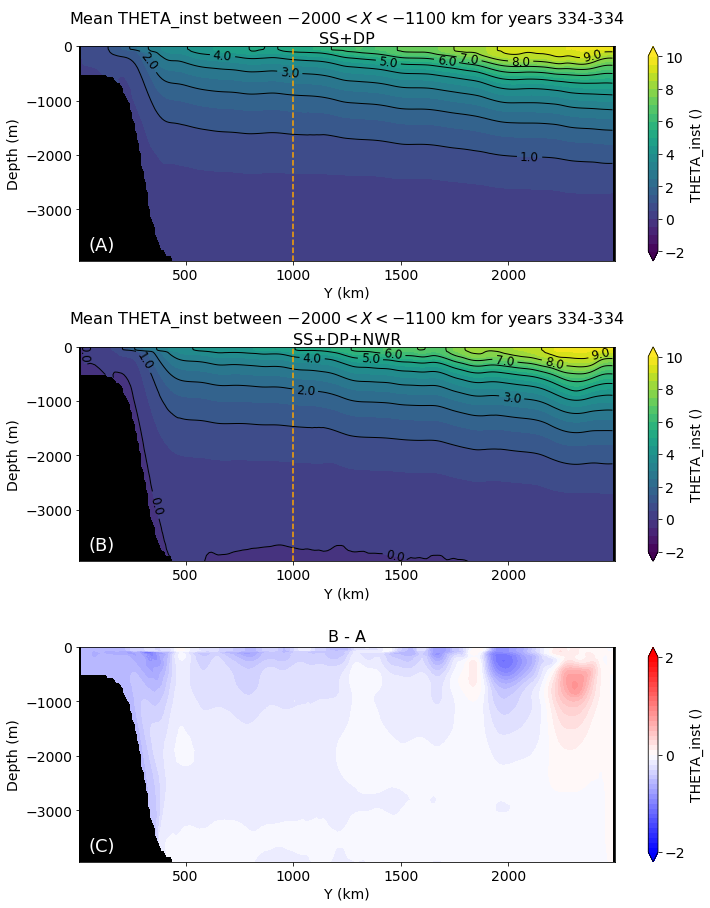

In [15]:
imp.reload(hf)
imp.reload(pf)

#tr = [89, 91]
xr = [-2000e3, -1100e3]
clvls = np.arange(-2, 10.01, 0.5)
clvls_ano = np.arange(-2, 2.1, 0.1)
vname = 'THETA'+ suffix
pf.plot_zonal_sect_anom(exp_names, vname, xr=xr, tr=tr, clvls=clvls, exp_names_alias=exp_names_alias, 
                        clvls_ano=clvls_ano, cmap=plt.cm.viridis, fz=14, plot_prtb=plot_prtb, plot_MLD=False)

# Meridional heat flux

Loading THETA for years 335-335...
Loading VVEL for years 335-335...
Loading THETA for years 335-335...
Loading VVEL for years 335-335...


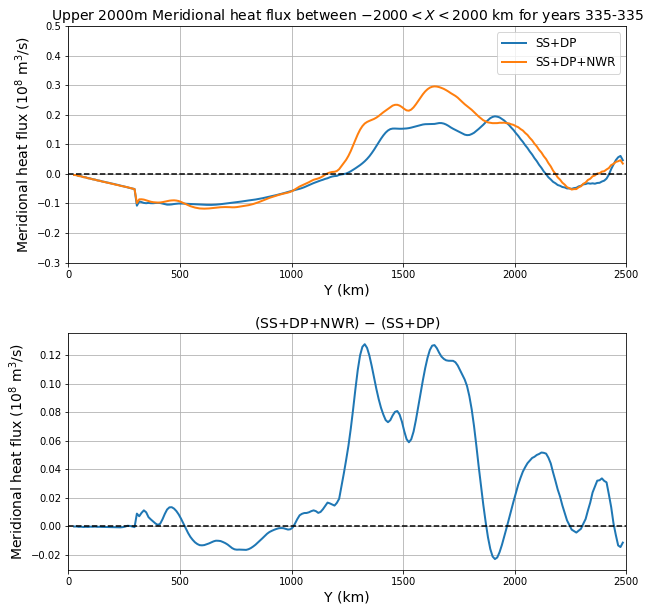

In [35]:
imp.reload(pf)
xr = [-2000e3, 2000e3]
zr = [-2000, 0]
pf.plot_vT(exp_names, tr_avg, xr, zr, exp_names_alias=exp_names_alias, ylim=[-0.3, 0.5])

## Overturning Circulation

In [36]:
##------------uncomment below to compute overturning streamfunctions----------------##
# imp.reload(of)
# of.calcOverturning(exp_names[0], tr=tr_avg)
# of.calcOverturning(exp_names[1], tr=tr_avg)

creating grid for vertical positions...
Loading flux output...
Loading LaVH1TH for years 335-335...
Loading LaHs1TH for years 335-335...
Loading THETA for years 335-335...
Loading VVEL for years 335-335...
Interpolating temp to finer grid...
Computing streamfunction...


/central/home/earlew/research/scripts/MITgcm_py/overturning_funcs.py:246: RuntimeWarning: invalid value encountered in greater
  pt_f_i1 = pt_f>ptlevs[Npt] # note: this is a boolean array but numpy flips values to int during calculations
/central/home/earlew/research/scripts/MITgcm_py/overturning_funcs.py:248: RuntimeWarning: invalid value encountered in less_equal
  pt_f_i2 = pt_f<=ptlevs[1]
/central/home/earlew/research/scripts/MITgcm_py/overturning_funcs.py:290: RuntimeWarning: Mean of empty slice
  pt_f_xtavg = np.nanmean(pt_f, axis=0)


mapping streamfunction back to z-coords...
creating grid for vertical positions...
Loading flux output...
Loading LaVH1TH for years 335-335...
Loading LaHs1TH for years 335-335...
Loading THETA for years 335-335...
Loading VVEL for years 335-335...
Interpolating temp to finer grid...
Computing streamfunction...


/central/home/earlew/research/scripts/MITgcm_py/overturning_funcs.py:246: RuntimeWarning: invalid value encountered in greater
  pt_f_i1 = pt_f>ptlevs[Npt] # note: this is a boolean array but numpy flips values to int during calculations
/central/home/earlew/research/scripts/MITgcm_py/overturning_funcs.py:248: RuntimeWarning: invalid value encountered in less_equal
  pt_f_i2 = pt_f<=ptlevs[1]


mapping streamfunction back to z-coords...


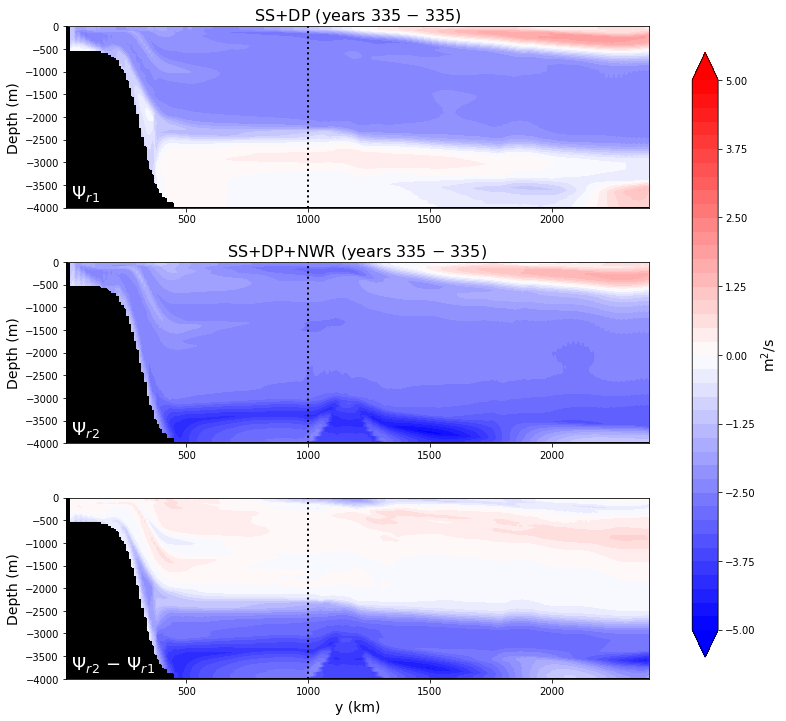

In [38]:
imp.reload(of)
imp.reload(pf)

clvls = np.arange(-5, 5.1, 0.25)
pf.plot_psi_z_comp(exp_names, tr=tr_avg, exp_names_alias=exp_names_alias, clvls=clvls, plot_mode=0)